### P519


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv("/content/Updated_Claimants_Dataset.csv")


In [3]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean


In [4]:
df.shape

(1340, 13)

In [5]:
df.info

<bound method DataFrame.info of       CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           5         0     0.0       1.0       0.0    50.0   2367.86   
1           3         1     1.0       0.0       0.0    18.0   3746.41   
2          66         1     0.0       1.0       0.0     5.0  14282.43   
3          70         0     0.0       1.0       1.0    31.0    519.12   
4          96         1     0.0       1.0       0.0    30.0   1354.31   
...       ...       ...     ...       ...       ...     ...       ...   
1335    34100         1     0.0       1.0       0.0     NaN  11749.94   
1336    34110         0     1.0       1.0       0.0    46.0    776.62   
1337    34113         1     1.0       1.0       0.0    39.0  13261.20   
1338    34145         0     1.0       0.0       0.0     8.0   9919.60   
1339    34153         1     1.0       1.0       0.0    30.0  10548.36   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0               Severe                 4497.19                      1   
1                Minor                 6216.38                      1   
2               Severe                17978.55                      0   
3               Severe                  753.54                      1   
4                Minor                 2167.42                      0   
...                ...                     ...                    ...   
1335          Moderate                14992.27                      0   
1336          Moderate                 1438.79                      0   
1337            Severe                18106.45                      1   
1338             Minor                17119.15                      1   
1339          Moderate                13522.19                      1   

      Settlement_Amount    Policy_Type  Driving_Record  
0               3221.74    Third-Party           Clean  
1               6166.17  Comprehensive           Clean  
2              13804.61  Comprehensive  Minor Offenses  
3                596.25  Comprehensive           Clean  
4               1714.83  Comprehensive           Clean  
...                 ...            ...             ...  
1335           13533.51  Comprehensive           Clean  
1336            1178.05    Third-Party  Major Offenses  
1337           16782.44    Third-Party  Minor Offenses  
1338           14315.98    Third-Party           Clean  
1339           11138.01    Third-Party           Clean  

[1340 rows x 13 columns]>

In [6]:
#checking null values
df.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,12
CLMINSUR,41
SEATBELT,48
CLMAGE,189
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


In [7]:
#handling missing values
df.fillna(df.mode().iloc[0], inplace=True)  # Fill with the most frequent value
df['CLMAGE'].fillna(df['CLMAGE'].mean(), inplace=True)  # Fill with mean



<ipython-input-7-f612c9b4d857>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CLMAGE'].fillna(df['CLMAGE'].mean(), inplace=True)  # Fill with mean


In [8]:
df.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,0
CLMINSUR,0
SEATBELT,0
CLMAGE,0
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


In [9]:
#Duplicate values
print("Duplicate Rows:", df.duplicated().sum())

# Remove duplicates if necessary
df.drop_duplicates(inplace=True)


Duplicate Rows: 0


In [10]:
#summary statistics
print("\summary statistics")
print(df.describe())

\summary statistics
            CASENUM     ATTORNEY       CLMSEX     CLMINSUR     SEATBELT  \
count   1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean   11202.001493     0.488806     0.562687     0.910448     0.016418   
std     9512.750796     0.500061     0.496240     0.285646     0.127124   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%     4177.000000     0.000000     0.000000     1.000000     0.000000   
50%     8756.500000     0.000000     1.000000     1.000000     0.000000   
75%    15702.500000     1.000000     1.000000     1.000000     0.000000   
max    34153.000000     1.000000     1.000000     1.000000     1.000000   

            CLMAGE          LOSS  Claim_Amount_Requested  \
count  1340.000000   1340.000000             1340.000000   
mean     25.817164   6684.598149            10341.430276   
std      19.879401   3785.039412             5678.906970   
min       0.000000    296.410000              562.760000   
25% 

In [11]:
# Checking datatypes
df.dtypes

,0
CASENUM,int64
ATTORNEY,int64
CLMSEX,float64
CLMINSUR,float64
SEATBELT,float64
CLMAGE,float64
LOSS,float64
Accident_Severity,object
Claim_Amount_Requested,float64
Claim_Approval_Status,int64


### Exploratory Data Analysis

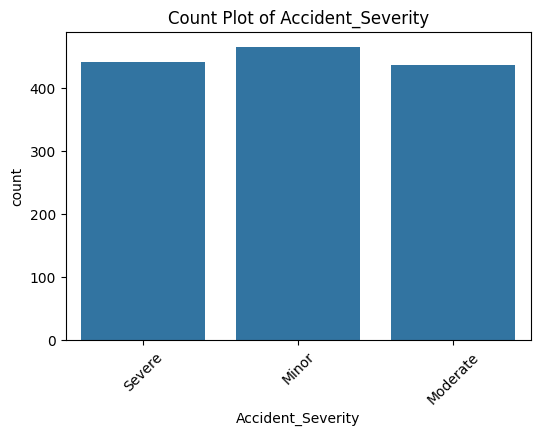

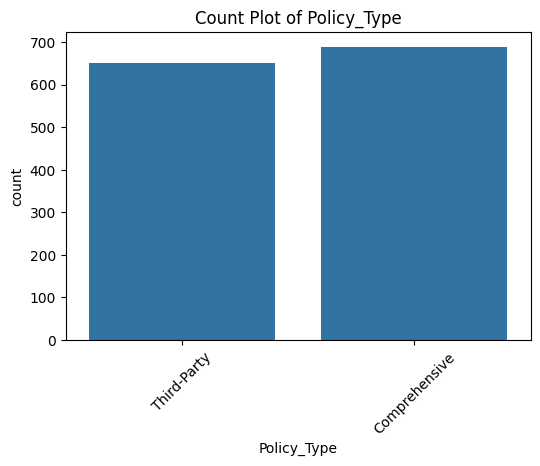

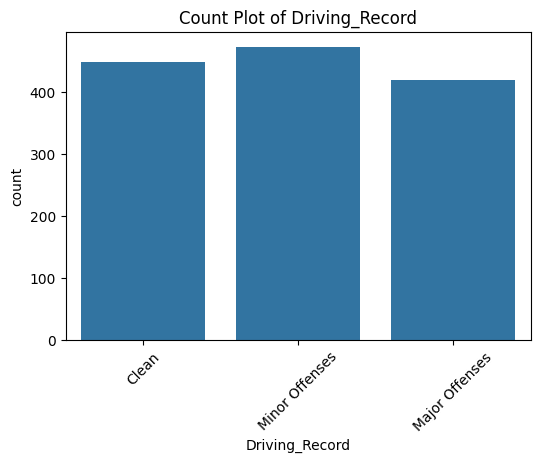

In [12]:
#Univariate Analysis (Feature Distributions)
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(f"Count Plot of {col}")
    plt.show()

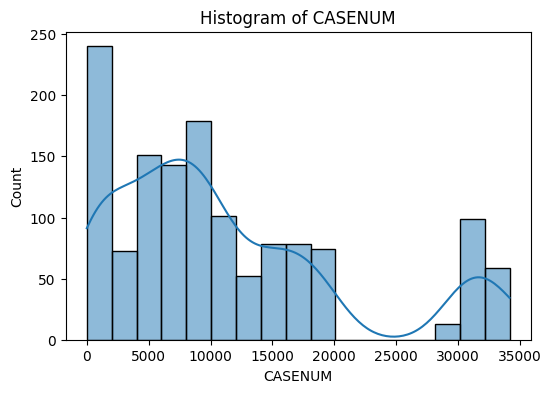

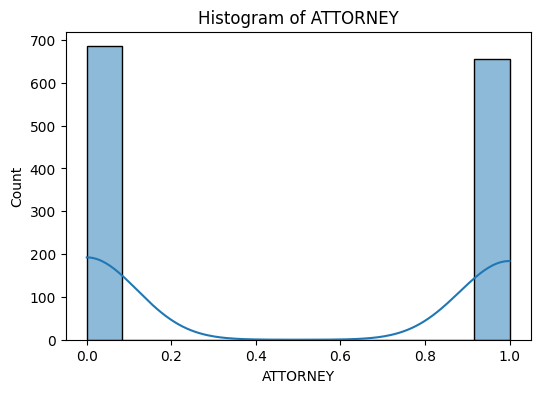

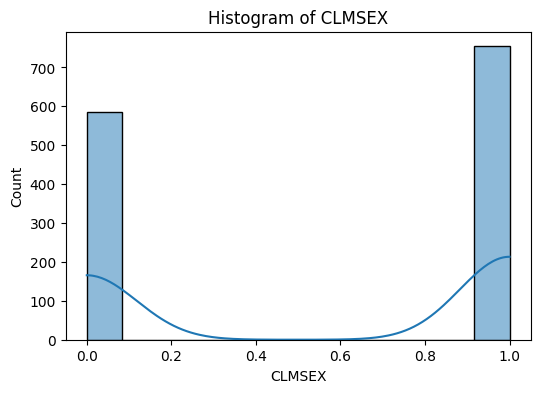

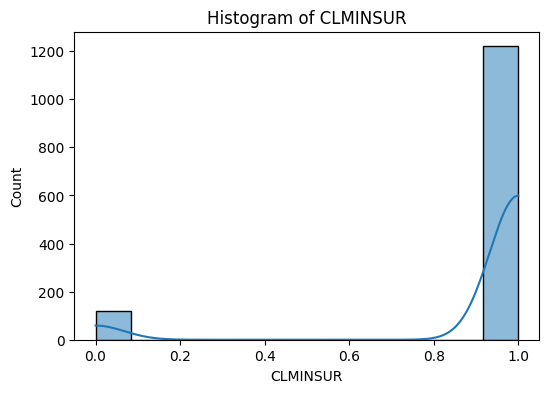

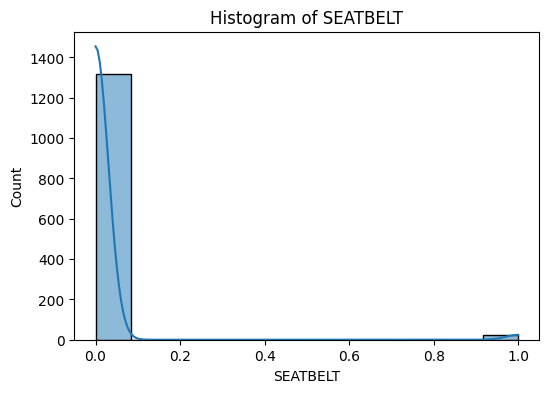

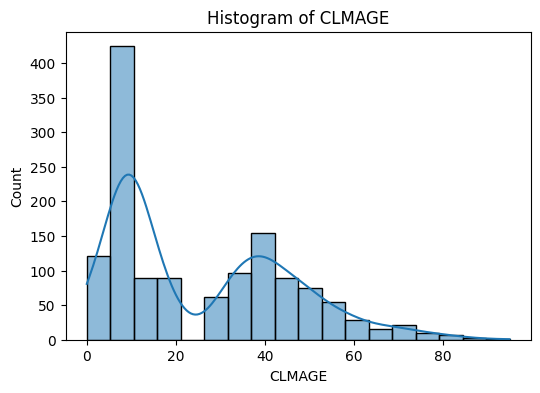

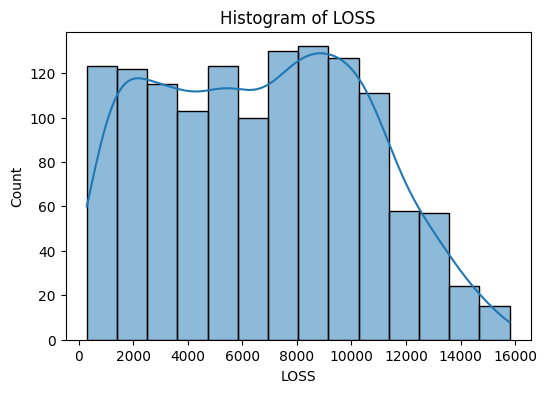

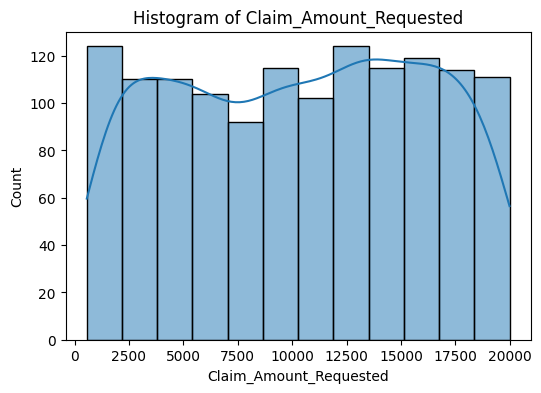

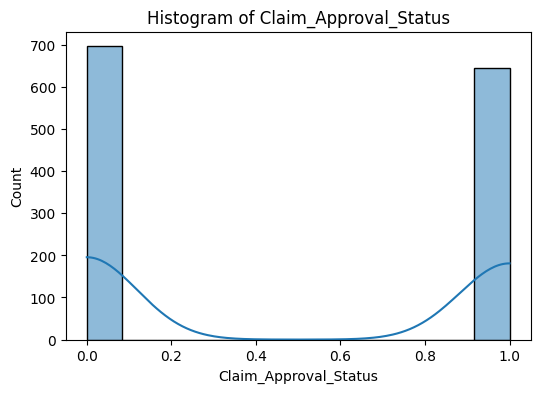

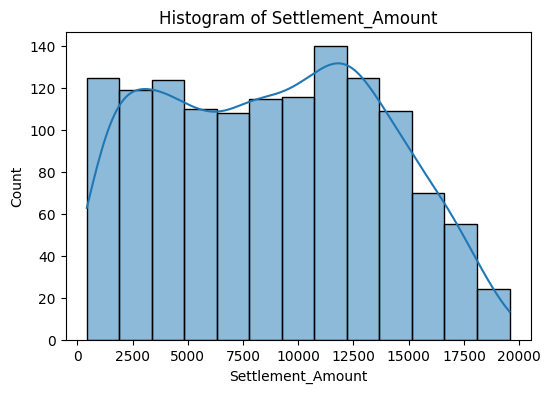

In [13]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

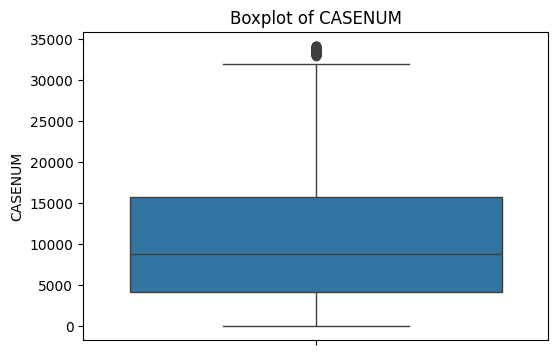

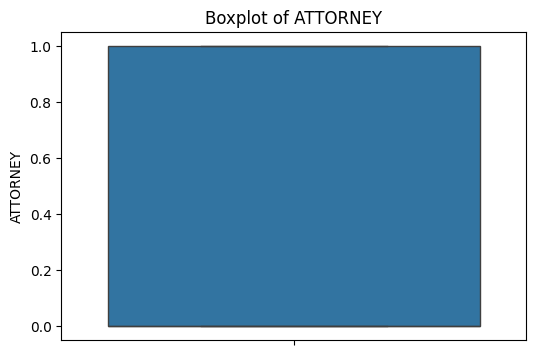

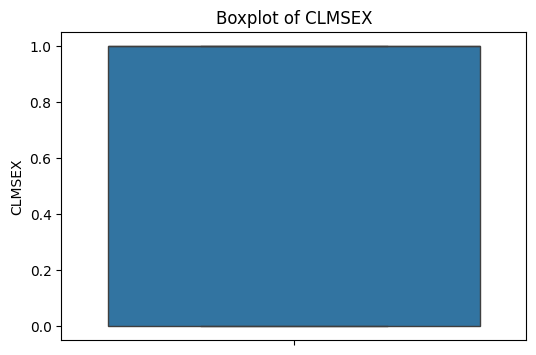

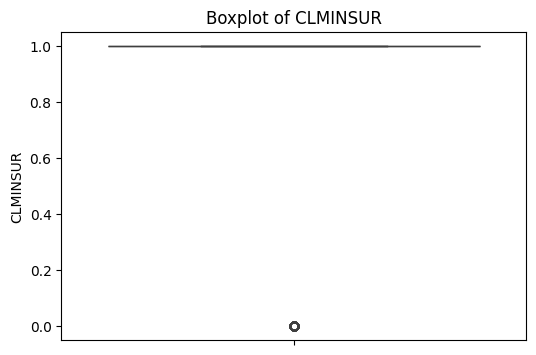

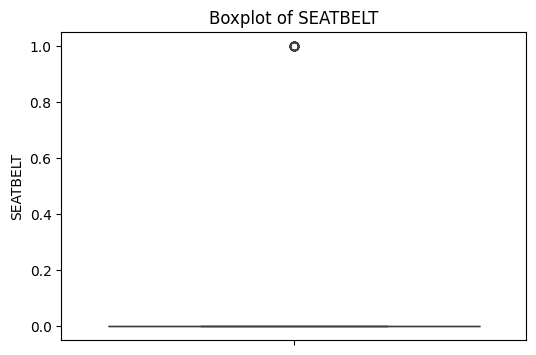

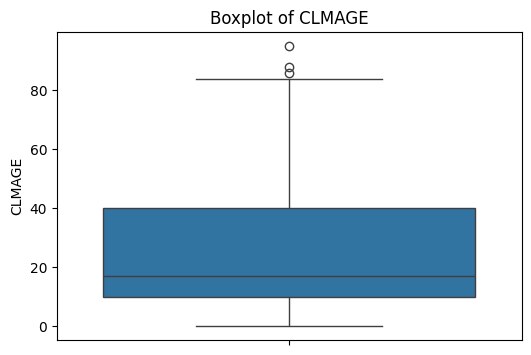

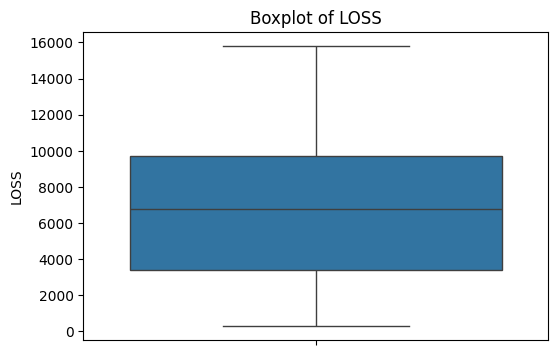

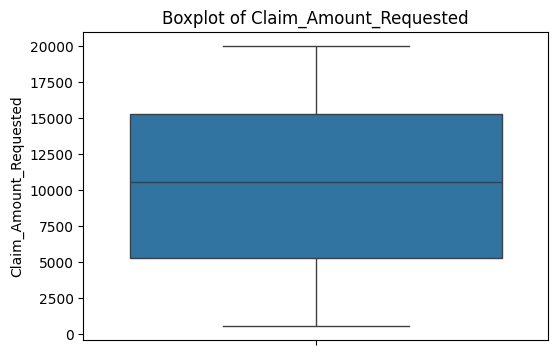

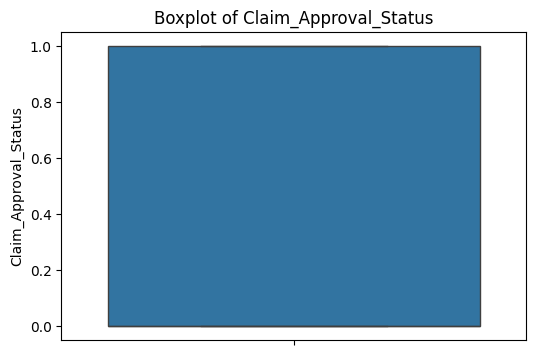

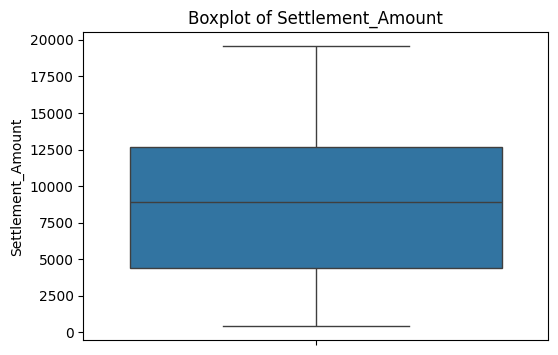

In [14]:
#Outlier detection using box plot
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [15]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

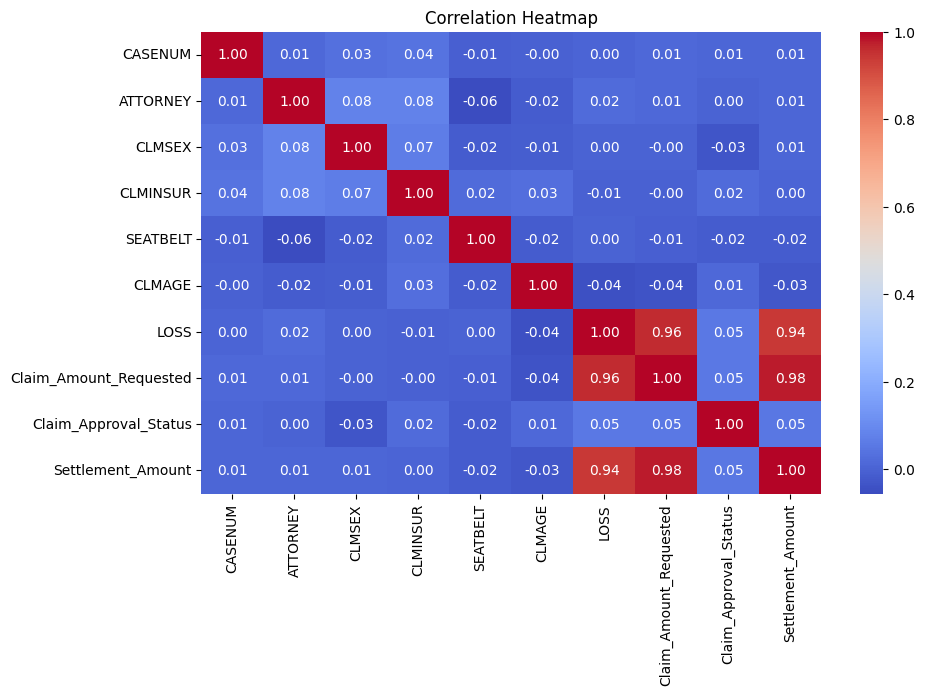

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

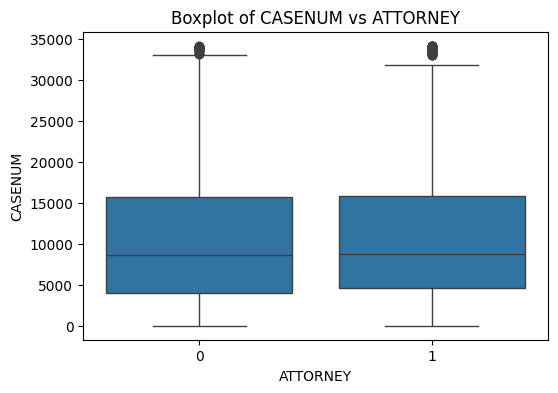

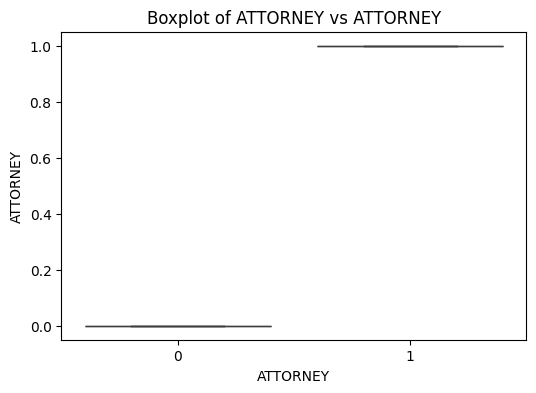

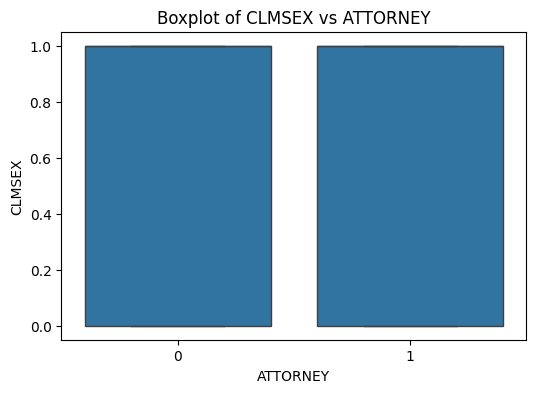

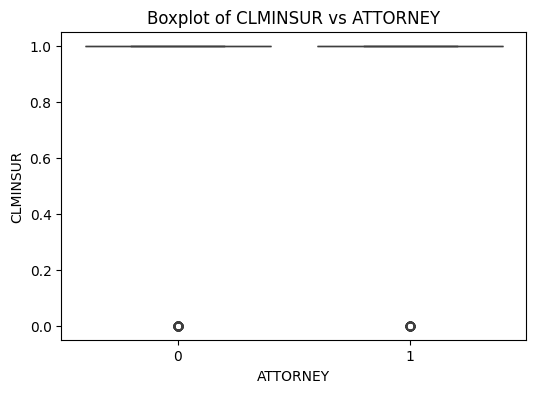

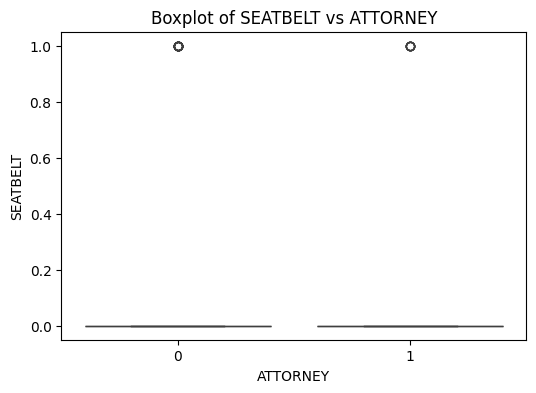

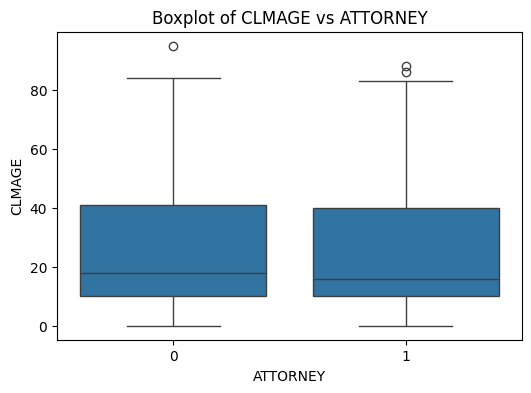

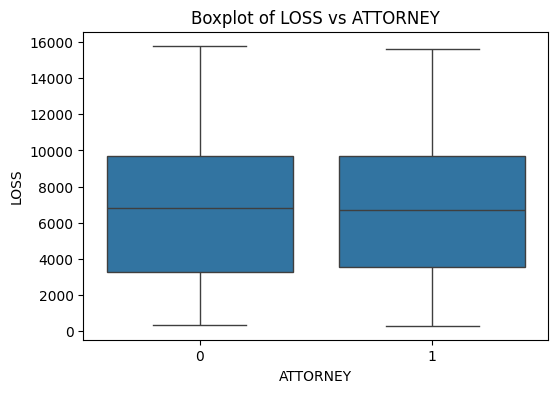

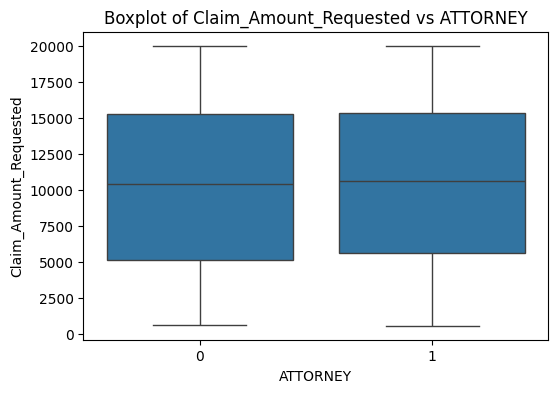

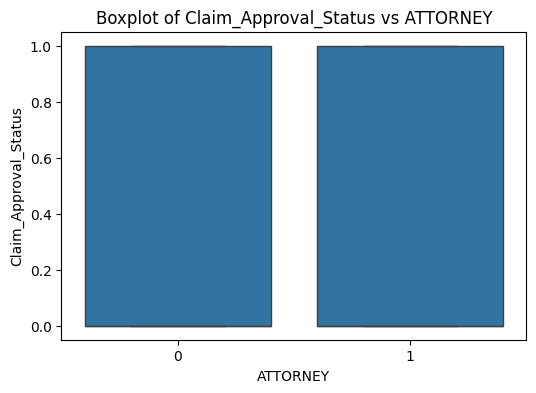

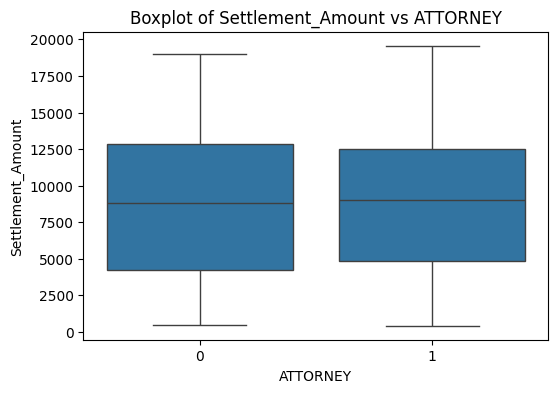

In [17]:
target_column = "ATTORNEY"
if target_column in df.columns:
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[target_column], y=df[col])
        plt.title(f"Boxplot of {col} vs {target_column}")
        plt.show()
else:
    print(f"Warning: Target column '{target_column}' not found in the dataset. Please update it correctly.")


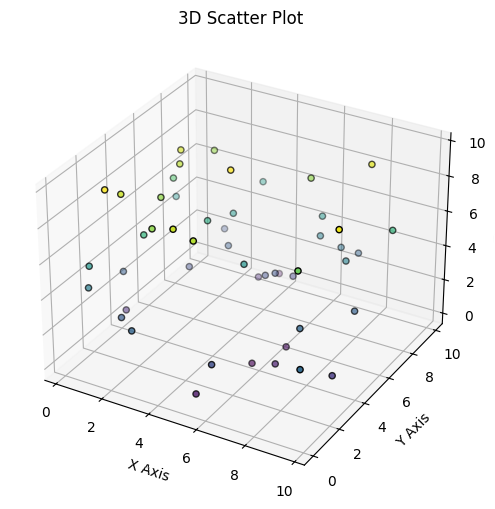

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Generate random data
np.random.seed(42)
x = np.random.rand(50) * 10  # Random values for X-axis
y = np.random.rand(50) * 10  # Random values for Y-axis
z = np.random.rand(50) * 10  # Random values for Z-axis

# Create 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o', edgecolors='k')

# Labels
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("3D Scatter Plot")

# Show plot
plt.show()

### Feature Engineering

In [19]:
# Encoding and Scaling
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

In [20]:
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(
    df.select_dtypes(include=['int64', 'float64'])
)

In [21]:
#Multicollinearity Check (VIF Analysis)
X = df.select_dtypes(include=['int64', 'float64'])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF) Analysis:")
print(vif_data)


Variance Inflation Factor (VIF) Analysis:
                   Feature        VIF
0                  CASENUM   1.005640
1                 ATTORNEY   1.018780
2                   CLMSEX   1.016542
3                 CLMINSUR   1.016455
4                 SEATBELT   1.010100
5                   CLMAGE   1.007036
6                     LOSS  13.297424
7        Accident_Severity   1.011999
8   Claim_Amount_Requested  36.699211
9    Claim_Approval_Status   1.009464
10       Settlement_Amount  24.214618
11             Policy_Type   1.004792
12          Driving_Record   1.011317


In [22]:
#Outlier Detection & Removal (IQR Method)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

print("\nFinal Shape of Data After Cleaning:", df.shape)


Final Shape of Data After Cleaning: (1145, 13)


### Model Building

 ### Model-01 Decision Tree


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score



In [24]:
# Drop 'CASENUM' as it is just an identifier
df.drop(columns=['CASENUM'], inplace=True)

In [25]:
# Handle missing values by filling with the median for numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)

In [26]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [27]:
# Define features and target
X = df.drop(columns=['Claim_Approval_Status'])
y = df['Claim_Approval_Status']
# Ensure target variable is categorical
if df['Claim_Approval_Status'].dtype != 'int64':
    df['Claim_Approval_Status'] = df['Claim_Approval_Status'].astype(int)

# Define features and target
X = df.drop(columns=['Claim_Approval_Status'])
y = df['Claim_Approval_Status']

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
# Predict on test data
y_pred = clf.predict(X_test)


In [31]:
# Compute accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Model Precision: {precision * 100:.2f}%")


Model Accuracy: 51.09%
Model Precision: 50.50%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


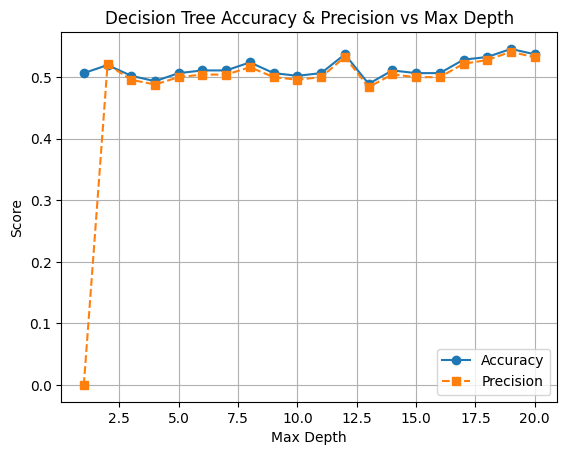

In [32]:
# Vary max_depth and plot accuracy & precision
depths = range(1, 21)
accuracies = []
precisions = []
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='binary'))

plt.plot(depths, accuracies, marker='o', label='Accuracy')
plt.plot(depths, precisions, marker='s', label='Precision', linestyle='dashed')
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.title("Decision Tree Accuracy & Precision vs Max Depth")
plt.legend()
plt.grid()
plt.show()


### Model-02 SVM

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score

In [34]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Train SVM model with hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [36]:
# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)


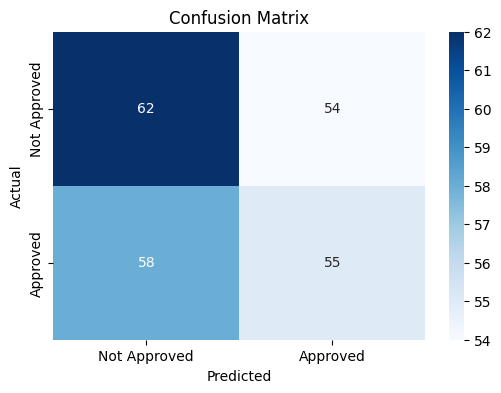

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy Score :", accuracy)
print("Precision Score:", precision)
print("F1 Score :", f1)
print(classification_report(y_test, y_pred))


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy Score : 0.5109170305676856
Precision Score: 0.5045871559633027
F1 Score : 0.4954954954954955
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       116
           1       0.50      0.49      0.50       113

    accuracy                           0.51       229
   macro avg       0.51      0.51      0.51       229
weighted avg       0.51      0.51      0.51       229



### Model-03 XGBoost

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score


In [40]:
# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [41]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print(classification_report(y_test, y_pred))


Accuracy Score: 0.4978165938864629
Precision Score: 0.49
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       116
           1       0.49      0.43      0.46       113

    accuracy                           0.50       229
   macro avg       0.50      0.50      0.50       229
weighted avg       0.50      0.50      0.50       229



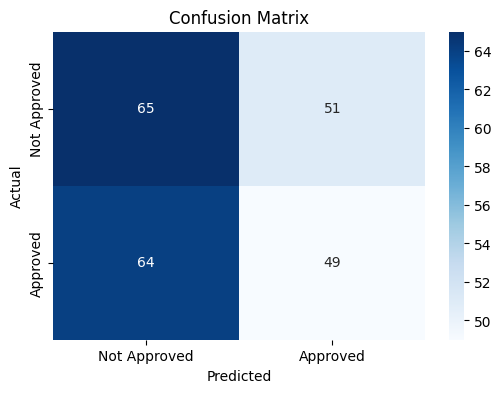

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

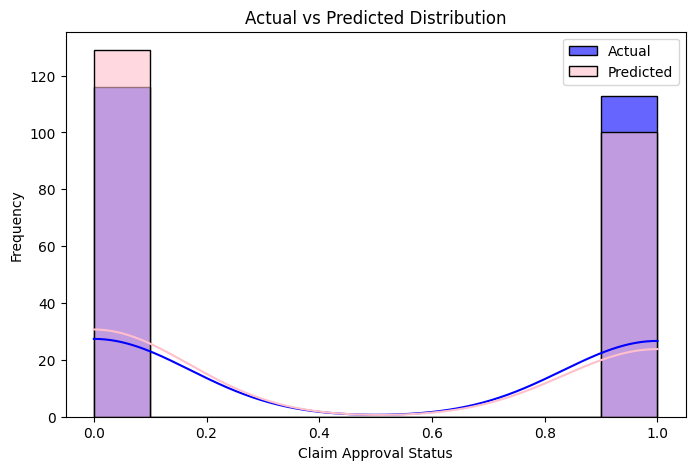

In [43]:
# General Data Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(y_test, color='blue', label='Actual', kde=True, bins=10, alpha=0.6)
sns.histplot(y_pred, color='pink', label='Predicted', kde=True, bins=10, alpha=0.6)
plt.xlabel('Claim Approval Status')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted Distribution')
plt.legend()
plt.show()

### Model-04 Linear Regrassion

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [45]:
# Drop irrelevant columns if they exist
columns_to_drop = ["CASENUM"]
df_cleaned = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [46]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=["Accident_Severity", "Policy_Type", "Driving_Record"], drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=["Settlement_Amount"])
y = df_encoded["Settlement_Amount"]


In [47]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [48]:
# Model evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [49]:
# Display evaluation metrics
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R² Score: -0.0055
Mean Absolute Error (MAE): 0.50
Mean Squared Error (MSE): 0.25


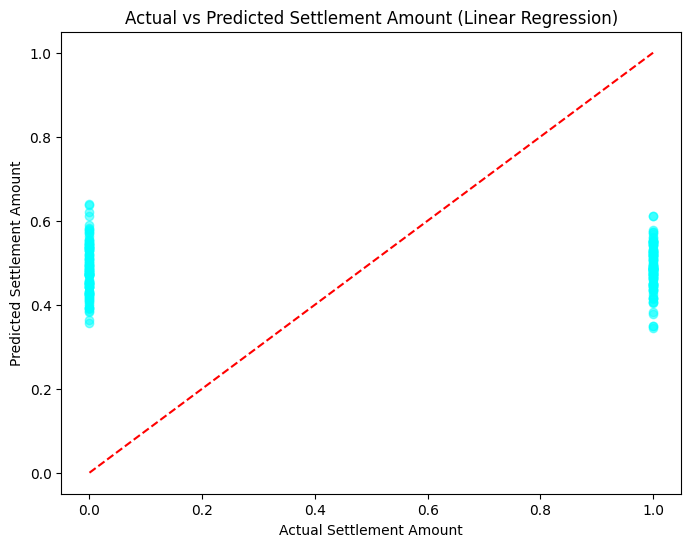

In [50]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="cyan")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Settlement Amount")
plt.ylabel("Predicted Settlement Amount")
plt.title("Actual vs Predicted Settlement Amount (Linear Regression)")
plt.show()


### Model-05 Random Forest

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [52]:
# Define features and target
X = df.drop(columns=['Claim_Approval_Status'])
y = df['Claim_Approval_Status']


In [53]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

In [54]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


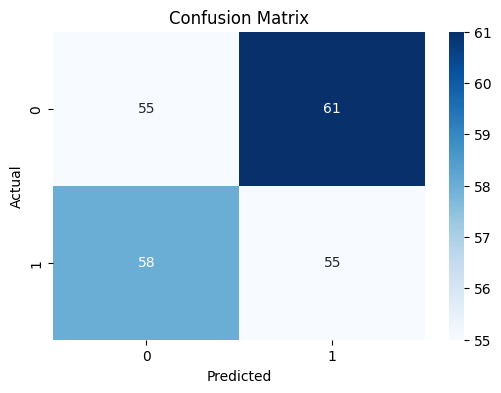

In [55]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [57]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Get best model
best_rf_model = grid_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test)

In [ ]:
# Hyperparameter Tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist,
                                   n_iter=20, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)



In [ ]:
# Get best model
best_rf_model = random_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test)

In [ ]:
# Evaluate tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("Initial Accuracy:", accuracy)
print("Tuned Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_best)

### Model-05 Logistic regression

In [58]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


In [60]:
df=pd.read_csv("/content/Updated_Claimants_Dataset.csv")


In [61]:
df.drop(columns=["CASENUM"], inplace=True)  # Drop irrelevant column

In [62]:
# Handle missing values
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

imputer_num = SimpleImputer(strategy="mean")
imputer_cat = SimpleImputer(strategy="most_frequent")
df[num_cols] = imputer_num.fit_transform(df[num_cols])
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])


In [63]:
# Encode categorical variables
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])


In [64]:
# Define features and target
X = df.drop(columns=["Claim_Approval_Status"])
y = df["Claim_Approval_Status"]


In [65]:
# Recompute num_cols after separating features
num_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()

In [66]:
# Standardize numerical features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [67]:
# Feature selection
selector = SelectKBest(mutual_info_classif, k=8)
X_new = selector.fit_transform(X, y)


In [68]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [69]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000, class_weight="balanced", C=1.0)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [70]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [71]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

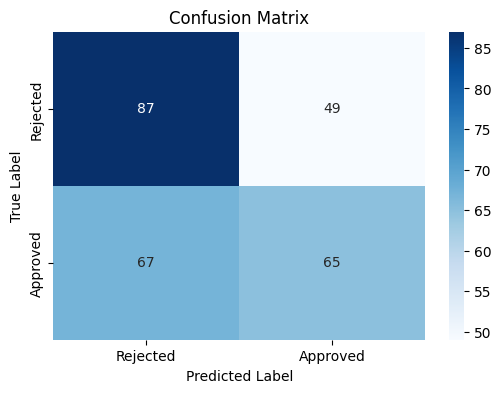

In [72]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

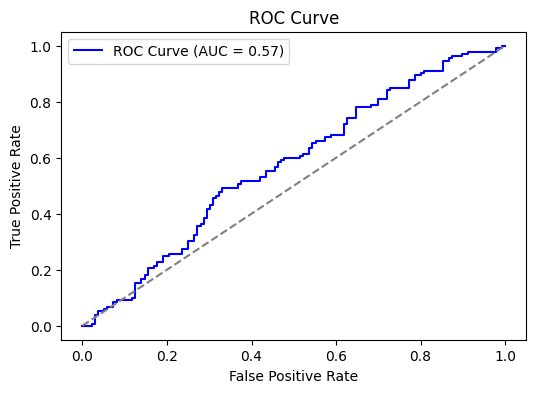

In [73]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [74]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")


Accuracy: 56.72%
Precision: 57.02%
Recall: 49.24%
F1 Score: 52.85%


In [75]:
# Save the model and scaler using Pickle
with open("logistic_regression_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)
# Save the trained model as a pickle file
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model and Scaler saved successfully using Pickle!")
print("Model trained and saved as 'model.pkl'.")

Model and Scaler saved successfully using Pickle!
Model trained and saved as 'model.pkl'.
